#### This second part assesses and explores the gathered data

#### Import libraries

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### the different datasets

In [2]:
tweet_json = []
with open('tweet_json.txt', 'r') as file1:
    for line in file1:
        tweet_json.append(json.loads(line))

df_tweet = pd.DataFrame(tweet_json)
print(df_tweet.shape)
df_tweet.head()

(2327, 6)


,retweet_count,reply_count,like_count,quote_count,tweet_id,source
0,7043,143,33893,219,892420643555336193,Twitter for iPhone
1,5319,171,29389,274,892177421306343426,Twitter for iPhone
2,3498,110,22105,145,891815181378084864,Twitter for iPhone
3,7254,142,37010,286,891689557279858688,Twitter for iPhone
4,7794,193,35389,296,891327558926688256,Twitter for iPhone


In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
print(twitter_archive.shape)
twitter_archive.head()

(2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
print(image_predictions.shape)
image_predictions.head()

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### df_tweet 

In [5]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
retweet_count    2327 non-null int64
reply_count      2327 non-null int64
like_count       2327 non-null int64
quote_count      2327 non-null int64
tweet_id         2327 non-null int64
source           2327 non-null object
dtypes: int64(5), object(1)
memory usage: 109.2+ KB


In [6]:
df_tweet.describe()

,retweet_count,reply_count,like_count,quote_count,tweet_id
count,2327.000000,2327.000000,2327.000000,2327.000000,2.327000e+03
mean,2482.456811,42.531156,7070.840997,71.569832,7.417930e+17
std,4203.351384,71.341414,10987.568889,220.364929,6.820795e+16
min,1.000000,0.000000,0.000000,0.000000,6.660209e+17
25%,498.000000,9.000000,1227.000000,0.000000,6.781394e+17
50%,1154.000000,24.000000,3055.000000,1.000000,7.178418e+17
75%,2875.500000,48.000000,8626.000000,69.500000,7.986547e+17
max,71035.000000,1130.000000,145227.000000,4353.000000,8.924206e+17


Text(0.5, 1.0, 'tweet sources')

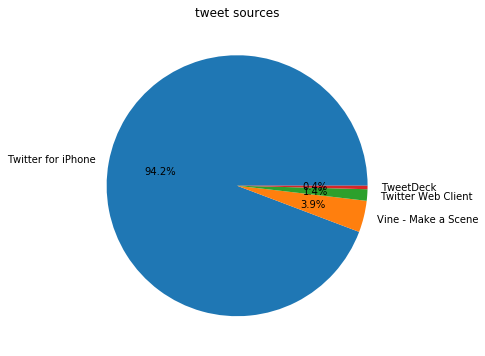

In [7]:
source = df_tweet.source.value_counts()
plt.figure(figsize = [6,6])
plt.pie(source, labels = source.index, autopct = '%0.1f%%')
plt.title('tweet sources')

No missing values. However reply_count and quote_count seem inconsistent are are not of much importance. They can be dropped.

In [8]:
df_tweet.drop(['reply_count', 'quote_count'], axis = 1, inplace = True)
df_tweet.columns

Index(['retweet_count', 'like_count', 'tweet_id', 'source'], dtype='object')

### twitter_archive

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

some columns have to many missing values. Such columns should be dropped.

###### drop columns with missing values

In [10]:
#drop columns with missing values
tw_arch_missing_values = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive.drop(tw_arch_missing_values, axis = 1, inplace = True)
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


###### melt the dog stages
doggo, floofer, pupper and puppo are different dog stages. They can be melted into one column. Some dogs have two stages, doggo and either floofer, pupper or puppo

In [11]:
#functions to get index of different stages
def stage_ind (stage):
    stage_data = twitter_archive[twitter_archive[stage] == stage]
    return stage_data.index

def double_stage_index(second_stage):
    double_stage = twitter_archive[(twitter_archive.doggo == 'doggo') & 
                                  (twitter_archive[second_stage] == second_stage)]
    return double_stage.index

In [12]:
doggo_ind = stage_ind('doggo')
floofer_ind = stage_ind('floofer')
pupper_ind = stage_ind('pupper')
puppo_ind = stage_ind('puppo')

ind_doggo_floofer = double_stage_index('floofer')
ind_doggo_pupper = double_stage_index('pupper')
ind_doggo_puppo = double_stage_index('puppo')

In [13]:
#create a single column for stage
twitter_archive['stage'] = 'Not stated'

#Properly labelling dog stage
twitter_archive.at[doggo_ind, 'stage'] = 'doggo'
twitter_archive.at[floofer_ind, 'stage'] = 'floofer'
twitter_archive.at[pupper_ind, 'stage'] = 'pupper'
twitter_archive.at[puppo_ind, 'stage'] = 'puppo'

twitter_archive.at[ind_doggo_floofer, 'stage'] = 'doggo/floofer'
twitter_archive.at[ind_doggo_pupper, 'stage'] = 'doggo/pupper'
twitter_archive.at[ind_doggo_puppo, 'stage'] = 'doggo/puppo'

#drop the different stages columns
twitter_archive = twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)
twitter_archive.sample(6)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
2320,666437273139982337,2015-11-17 02:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a lone northeastern Cumberbatch. H...,https://twitter.com/dog_rates/status/666437273...,7,10,None,Not stated
1419,698342080612007937,2016-02-13 03:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. He's training for the tetherb...,https://twitter.com/dog_rates/status/698342080...,11,10,Maximus,Not stated
562,802600418706604034,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,Not stated
2234,668190681446379520,2015-11-21 22:14:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Skittles. I would kidnap Skittles. Pin...,https://twitter.com/dog_rates/status/668190681...,12,10,Skittles,Not stated
163,860276583193509888,2017-05-04 23:34:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,https://twitter.com/dog_rates/status/860276583...,12,10,Jordy,Not stated
1535,689977555533848577,2016-01-21 01:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a pup wearing a beret. ...,https://twitter.com/dog_rates/status/689977555...,12,10,None,Not stated


In [14]:
twitter_archive['stage'].value_counts()

Not stated       1976
pupper            245
doggo              83
puppo              29
doggo/pupper       12
floofer             9
doggo/puppo         1
doggo/floofer       1
Name: stage, dtype: int64

##### proper column format

Change 'timestamp' to datetime, 'rating_numerator' and 'rating denominator' to float and correctly extract 'rating_numerator' and 'rating denominator'.
I believe the rating_denomators and denominators should be 1 or 2 digits, like from 0 to 99, meaning 990 should be 99.0 and 1776 is 17.76

In [15]:
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])
twitter_archive['rating_numerator'] = twitter_archive['rating_numerator'].astype('float')
twitter_archive['rating_denominator'] = twitter_archive['rating_denominator'].astype('float')


twitter_archive.rating_numerator = twitter_archive.rating_numerator.apply(lambda x: x/(10**(len(str(x)) - 4)) if len(str(x)) > 2 else x)
twitter_archive.rating_denominator = twitter_archive.rating_denominator.apply(lambda x: x/(10**(len(str(x)) - 4)) if len(str(x)) > 2 else x)
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
stage                 2356 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 165.8+ KB


In [16]:
twitter_archive.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.356000e+03,2356.000000,2356.000000
mean,7.427716e+17,23.112589,10.230051
std,6.856705e+16,25.464250,3.540923
min,6.660209e+17,0.000000,0.000000
25%,6.783989e+17,11.000000,10.000000
50%,7.196279e+17,12.000000,10.000000
75%,7.993373e+17,13.000000,10.000000
max,8.924206e+17,99.000000,90.000000


##### image_predictions

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


there are no missing values.

#### Merged tables

The 3 tables are not necessary, they all contain details about dog tweets. They can be merged into a single table

In [18]:
#both twitter_archive and df_tweet have source columns. Drop one of the columns
twitter_archive.drop('source', axis = 1, inplace = True)

tweet_merged = twitter_archive.merge(df_tweet, how = 'inner', on = 'tweet_id')
tweet_merged = tweet_merged.merge(image_predictions, how = 'inner', on = 'tweet_id')
print(tweet_merged.shape)
tweet_merged.head()

(2057, 22)


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,like_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,Not stated,7043,33893,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,Not stated,5319,29389,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,Not stated,3498,22105,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,Not stated,7254,37010,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,Not stated,7794,35389,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Further cleaning

I found many results where dog predictions are wrong if
1. 'p1_dog' is False, 
2. 'like_count' is 0, 
3. 'name' is None and 
4. 'stage' is others.

Also where 
1. 'rating_numerator' is below 5, and
2. 'p1_dog' is  False 

In [19]:
not_dogs = tweet_merged.query('(p1_dog == False & like_count ==0 & name =="None" & stage =="others") or (rating_numerator <5 and p1_dog== False)')

tweet_merged = tweet_merged.drop(not_dogs.index, axis = 0)

In [20]:
tweet_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2056
Data columns (total 22 columns):
tweet_id              2055 non-null int64
timestamp             2055 non-null datetime64[ns, UTC]
text                  2055 non-null object
expanded_urls         2055 non-null object
rating_numerator      2055 non-null float64
rating_denominator    2055 non-null float64
name                  2055 non-null object
stage                 2055 non-null object
retweet_count         2055 non-null int64
like_count            2055 non-null int64
source                2055 non-null object
jpg_url               2055 non-null object
img_num               2055 non-null int64
p1                    2055 non-null object
p1_conf               2055 non-null float64
p1_dog                2055 non-null bool
p2                    2055 non-null object
p2_conf               2055 non-null float64
p2_dog                2055 non-null bool
p3                    2055 non-null object
p3_conf               20

### Insights and Visualization

##### Likes and retweets

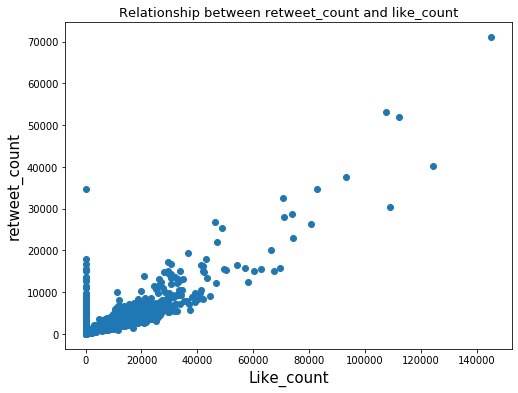

In [21]:
plt.figure(figsize = (8,6))
plt.scatter(tweet_merged.like_count, tweet_merged.retweet_count)
plt.xlabel('Like_count', fontsize = 15)
plt.ylabel('retweet_count', fontsize = 15)
plt.title('Relationship between retweet_count and like_count', fontsize = 13);

Like count is seriously affected by the retweet count. The more a post is retweeted, the more its liked.

### stage and like/ retweet

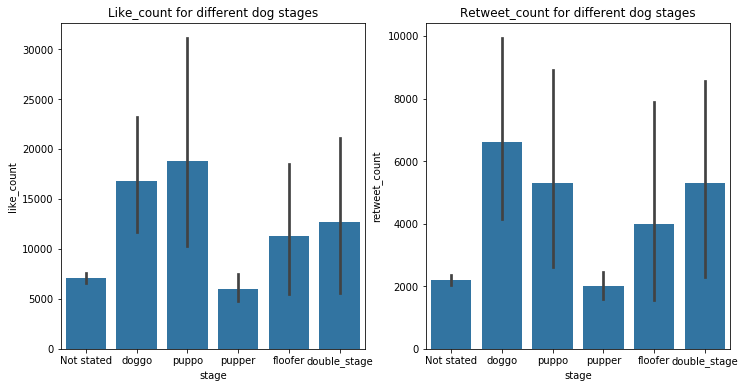

In [22]:
tweet_merged_adj = tweet_merged.copy()
tweet_merged_adj['stage'] = tweet_merged_adj['stage'].apply(lambda x: x.replace(x,'double_stage') if '/' in x else x)

base_color = sns.color_palette()[0]

plt.figure(figsize = [12,6])
plt.subplot(1,2,1)
sns.barplot(data = tweet_merged_adj, x = 'stage', y= 'like_count', color = base_color)
plt.title('Like_count for different dog stages')

plt.subplot(1,2,2)
sns.barplot(data = tweet_merged_adj, x = 'stage', y= 'retweet_count', color = base_color)
plt.title('Retweet_count for different dog stages');

'pupper' had the least like_count. Perhaps puppers or the name 'pupper' is not as liked as others.

'Not stated' is the 2nd least liked. My guess is that using of the dog stage name increases the chances of being liked, pupper being an exception

tweets with 'puppo' are most liked, followed by tweets with 'doggo' second most liked. I think they sound cuter.

### Timestamp and retweet/likes

In [23]:
#change 'timestamp' column to one easy to work with
tweet_merged['year'] = pd.DatetimeIndex(tweet_merged['timestamp']).year
tweet_merged['month'] = pd.DatetimeIndex(tweet_merged['timestamp']).month
tweet_merged['year_month'] = tweet_merged['year'].astype('str') + '-' + tweet_merged['month'].astype(str).str.pad(2, fillchar='0')

tweet_merged = tweet_merged.drop(['year', 'month'], axis = 1)
tweet_merged.head(3)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,like_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,year_month
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,Not stated,7043,33893,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,Not stated,5319,29389,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,Not stated,3498,22105,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

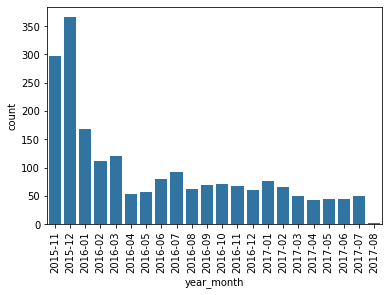

In [24]:
ym_like = tweet_merged.groupby('year_month')['like_count'].mean()
sns.countplot(data = tweet_merged, x = 'year_month', order = ym_like.index, color = base_color)
plt.xticks(rotation = 90)

The tweets were made over a 22 month period. First tweet was made in November 2015, and the last in August, 2017. About half of the total tweets were made in the first 5 months.

Text(0.5, 1.0, 'Retweets count over months')

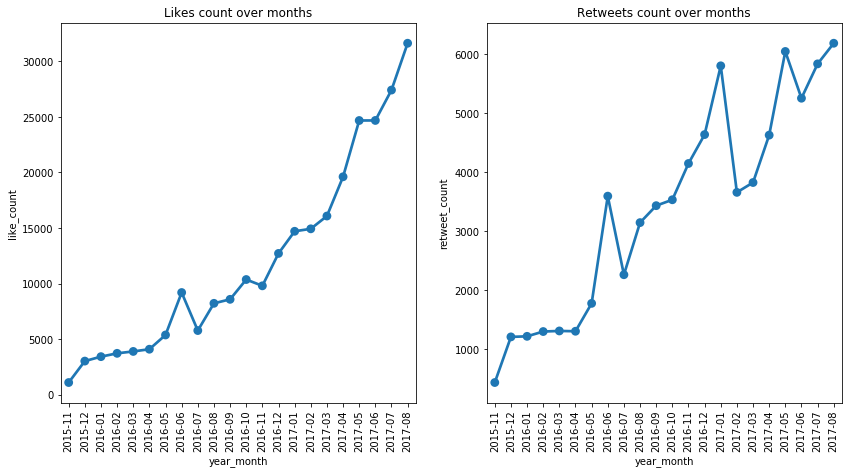

In [25]:
plt.figure(figsize = [14,7])
plt.subplot(1,2,1)
sns.pointplot(data = tweet_merged, x = 'year_month', y ='like_count', order = ym_like.index, ci = None)
plt.xticks(rotation = 90)
plt.title('Likes count over months')

plt.subplot(1,2,2)
sns.pointplot(data = tweet_merged, x = 'year_month', y ='retweet_count', order = ym_like.index,  ci = None)
plt.xticks(rotation = 90)
plt.title('Retweets count over months')

Notice the retweets and likes were so much affected by the time of posting. Those postings made earlier, in 2015, had the least likes and retweets. the most recent tweets had the highest likes and retweets.
This can largely be attributted to the increase in tweeter users over time.